In [1]:
# only adjust settings in this cell
state = 'MT'
root_name = 'Missoula' # which county will root our first district 
k = 2                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or inverse_polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 2 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 542112
Single district upper population limit U = 542113


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Missoula County to be the root. In our graph, this is vertex # 35


In [6]:
from optimization import districting_heuristic
import time

start_time = time.perf_counter()
plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)
print("Total time =",time.perf_counter() - start_time)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900K, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 448 rows, 527 columns and 2227 nonzeros
Model fingerprint: 0xfe30c8c2
Variable types: 277 continuous, 250 integer (250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 67 rows and 65 columns
Presolve time: 0.00s
Presolved: 381 rows, 462 columns, 1819 nonzeros
Variable types: 269 continuous, 193 integer (193 binary)

Root relaxation: objective 3.927116e+00, 246 iterations, 0.00 se

# cut_edges perimeter ave_invpp
0 27 61.4126 7.0534
1 29 58.2894 5.6309
2 27 53.3236 4.8958
3 28 60.1042 7.2329
4 29 60.3414 6.6513
5 29 61.9419 7.2987
6 29 60.3466 6.6672
7 24 56.1604 5.9352
8 26 57.1428 6.1612
9 29 60.9352 6.477


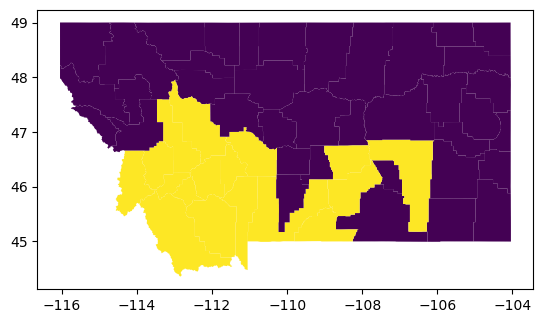

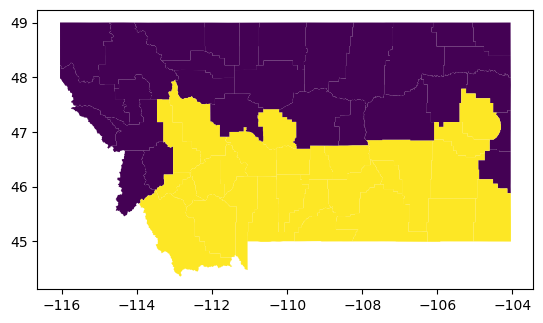

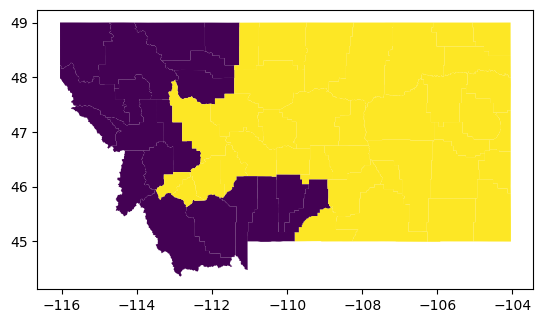

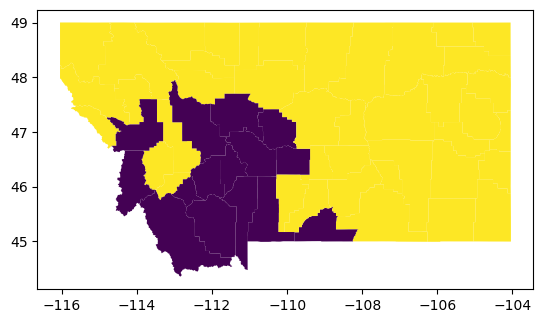

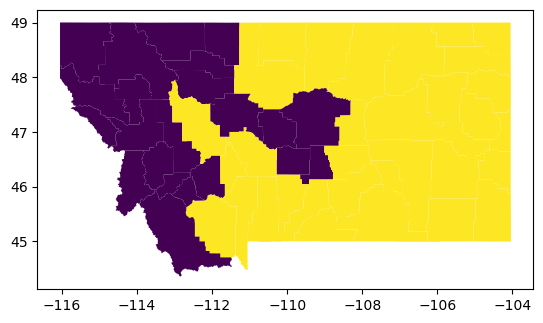

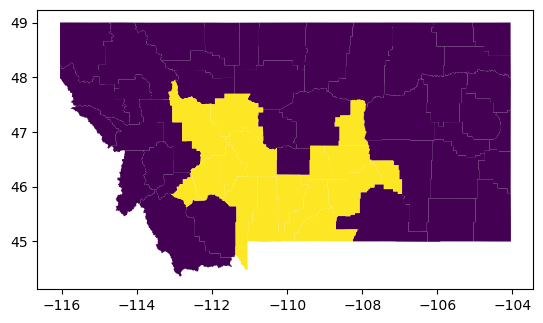

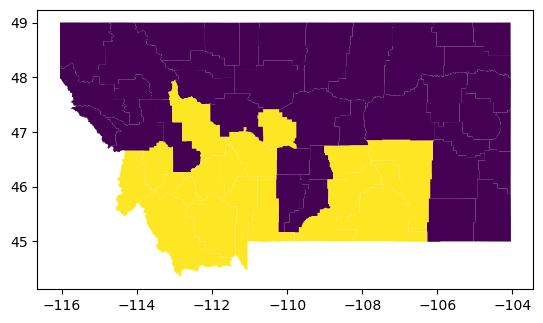

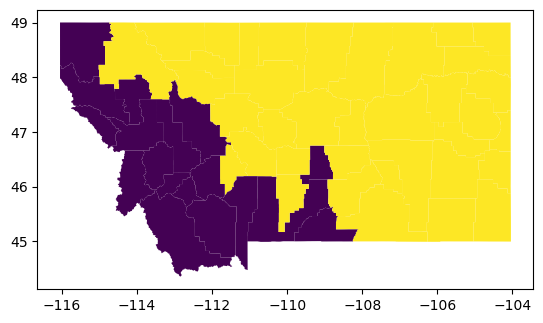

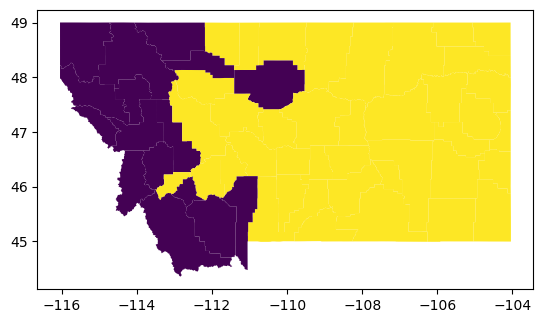

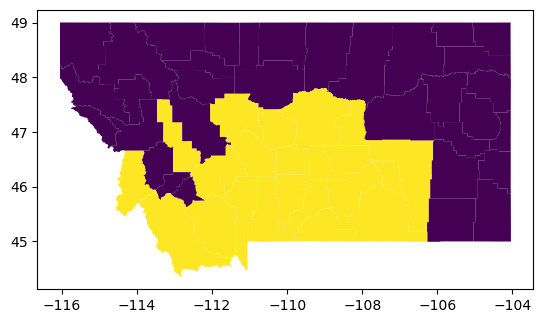

In [7]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) #, plan)
    draw_plan( filepath, filename, G, plan )

In [8]:
print("plans =",plans)

plans = [[[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 30, 32, 33, 34, 35, 36, 37, 38, 42, 45, 47, 48, 49, 51, 53, 54, 55], [0, 4, 9, 13, 14, 18, 27, 28, 29, 31, 39, 40, 41, 43, 44, 46, 50, 52]], [[2, 3, 4, 6, 7, 10, 11, 15, 16, 17, 19, 22, 23, 24, 26, 31, 32, 33, 34, 35, 36, 37, 42, 47, 48, 51, 53, 54, 55], [0, 1, 5, 8, 9, 12, 13, 14, 18, 20, 21, 25, 27, 28, 29, 30, 38, 39, 40, 41, 43, 44, 45, 46, 49, 50, 52]], [[2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54], [0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55]], [[0, 9, 12, 14, 28, 30, 31, 35, 39, 40, 43, 46, 50, 52, 53], [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 33, 34, 36, 37, 38, 41, 42, 44, 45, 47, 48, 49, 51, 54, 55]], [[2, 3, 4, 8, 10, 12, 13, 19, 22, 23, 26, 28, 29, 30, 31, 35, 40, 47, 52, 53, 54, 55], [0, 1, 5, 6, 7, 9, 11, 1